In [4]:
from src.data.load_data import load_fitness_data, load_functional_fitness_data

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from Bio.Seq import Seq

In [5]:
fitness_df = load_fitness_data()

In [10]:
dna_sequences = fitness_df["sequence_dna"]
amino_acid_sequences = dna_sequences.apply(lambda dna: "".join(Seq(dna).translate()))

In [17]:
fitness_df.dtypes

sequence_dna       object
fitness           float64
p_value           float64
standard_error    float64
dtype: object

## General fitness distribution

In [9]:
fitness_df.describe()

,fitness,p_value,standard_error
count,261333.000000,2.613320e+05,261332.000000
mean,-0.654096,6.518118e-04,0.038276
std,0.293208,1.943004e-02,0.015938
min,-1.174803,0.000000e+00,0.004214
25%,-0.759669,3.706502e-130,0.028345
50%,-0.713981,1.523103e-85,0.035609
75%,-0.665032,1.666429e-54,0.045544
max,1.395792,9.934742e-01,0.119528


/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fitness', ylabel='Count'>

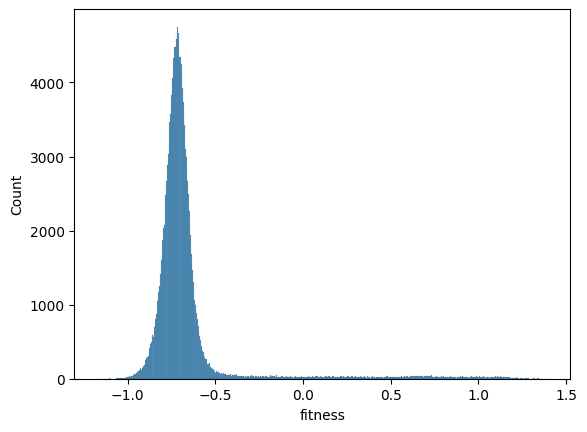

In [10]:
sns.histplot(data=fitness_df, x="fitness")

In [11]:
functional_df = load_functional_fitness_data()

In [12]:
functional_df.describe()

,fitness,p_value,standard_error
count,18039.000000,1.803800e+04,18038.000000
mean,0.258642,9.443357e-03,0.014649
std,0.531829,7.339485e-02,0.010235
min,-0.507970,0.000000e+00,0.004214
25%,-0.244416,0.000000e+00,0.008342
50%,0.232808,8.594792e-150,0.011340
75%,0.714988,1.613028e-41,0.017355
max,1.395792,9.934742e-01,0.086880


/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fitness', ylabel='Count'>

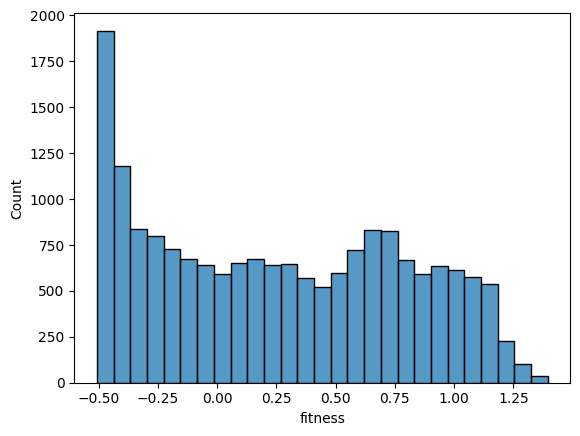

In [13]:
sns.histplot(data=functional_df, x="fitness")